Youtube AdView Prediction Project

1.Importing Data

In [ ]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# importing data from dataseet

data = pd.read_csv("/content/train.csv")
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data.shape

(14999, 9)

2.Pre Processing the Data

In [ ]:
data.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [ ]:
data.isnull().any()

vidid        False
adview       False
views        False
likes        False
dislikes     False
comment      False
published    False
duration     False
category     False
dtype: bool

In [ ]:
data['category'].unique()

array(['F', 'D', 'C', 'H', 'E', 'B', 'G', 'A'], dtype=object)

In [ ]:
# Assuming 'category_column' is the name of the column containing characters A,B,C,D,E,F,G,H

# Define a mapping dictionary
category_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}

# Map the values in the category_column using the mapping dictionary
data['category'] = data['category'].map(category_mapping)

# Display the transformed column
print(data['category'])


0        6
1        4
2        3
3        8
4        4
        ..
14994    1
14995    4
14996    2
14997    7
14998    4
Name: category, Length: 14999, dtype: int64


In [ ]:
data.isnull().any()

vidid        False
adview       False
views        False
likes        False
dislikes     False
comment      False
published    False
duration     False
category     False
dtype: bool

In [ ]:


# Check if the character is present in each element of the column
is_present = data['comment'].str.contains('F')

# Print the rows where the character is present
rows_with_character = data[is_present]
print(rows_with_character)


           vidid  adview    views likes dislikes comment   published  \
104    VID_10539      14   921464   430      343       F  2016-08-06   
116     VID_2480       2   678578   267      112       F  2014-08-17   
126     VID_2049       1    10328    79       14       F  2014-04-18   
216     VID_7201      22  1245266   821      340       F  2016-08-17   
247     VID_9240       1   115598    90       39       F  2017-02-22   
...          ...     ...      ...   ...      ...     ...         ...   
14892    VID_175      31   334361   489      356       F  2013-03-12   
14938   VID_9233       1   931533  2637     1684       F  2017-02-03   
14977  VID_13740       4    10716     F        F       F  2016-09-30   
14990  VID_11386      15   525829   350      222       F  2016-07-08   
14991   VID_2502       1   333336   152       84       F  2015-12-11   

       duration  category  
104     PT1M46S         4  
116     PT7M47S         3  
126     PT4M21S         2  
216     PT1M25S        

In [ ]:
#removing character F preseent in different columns

data=data[data.likes!='F']
data=data[data.dislikes!='F']
data=data[data.views!='F']
data=data[data.comment!='F']


In [ ]:


# ReCheck if the character is present in each element of the column
is_present = data['comment'].str.contains('F')

# Print the rows where the character is present
rows_with_character = data[is_present]
print(rows_with_character)


Empty DataFrame
Columns: [vidid, adview, views, likes, dislikes, comment, published, duration, category]
Index: []


3.Transforming the categorical columns to numeric

In [ ]:
#converting values to numeric
data['views']=pd.to_numeric(data['views'])
data['comment']=pd.to_numeric(data['comment'])
data['likes']=pd.to_numeric(data['likes'])
data['dislikes']=pd.to_numeric(data['dislikes'])

In [ ]:
data.dtypes

vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object

In [ ]:
# Encoding features like published,duration and vivid

from sklearn.preprocessing import LabelEncoder

data['duration']= LabelEncoder().fit_transform(data['duration'])
data['published']=LabelEncoder().fit_transform(data['published'])
data['vidid']=LabelEncoder().fit_transform(data['vidid'])

In [ ]:
data.dtypes

vidid        int64
adview       int64
views        int64
likes        int64
dislikes     int64
comment      int64
published    int64
duration     int64
category     int64
dtype: object

In [ ]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
# convert Time_in_dec for duration

import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("/content/train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)

data["duration"]=time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


2. Visualization of the training data

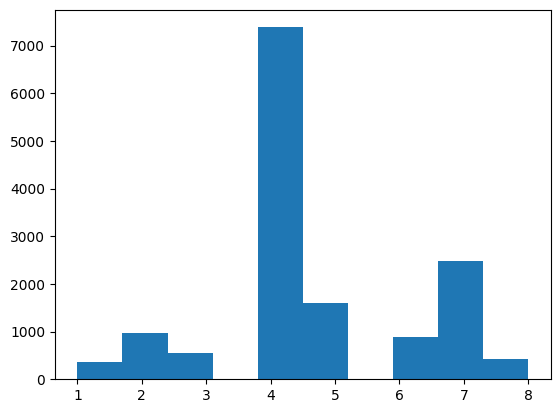

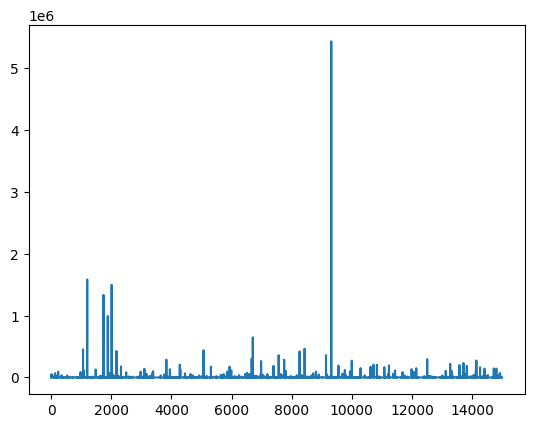

In [ ]:
# Individual Plots
plt.hist(data["category"])
plt.show()
plt.plot(data["adview"])
plt.show()


In [ ]:
#Removing Outlier values from data
data= data[data["adview"] <2000000]

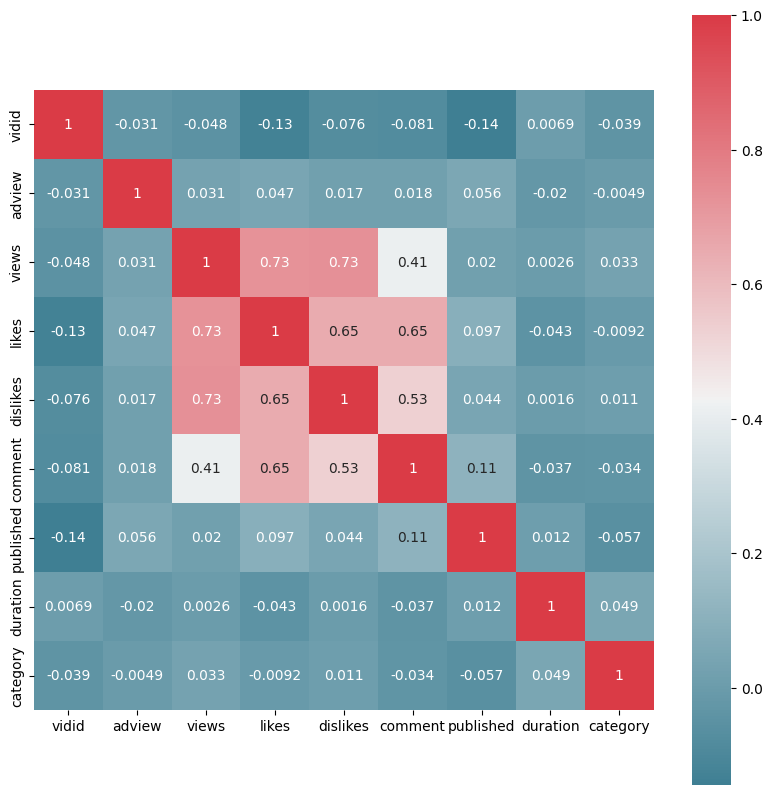

In [ ]:
# Drawing Heat map

import seaborn as sns
f,ax = plt.subplots(figsize=(10, 10))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)

plt.show()

Normalize and Splitting Data

In [ ]:
Y_train = pd.DataFrame(data = data.iloc[:,1].values, columns = ['target'])
data=data.drop(['vidid','adview'],axis=1)


In [ ]:
data.head()
Y_train

,target
0,40
1,2
2,1
3,6
4,1
...,...
14631,2
14632,1
14633,4
14634,1


In [ ]:
#splitting the data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y_train, test_size = 0.2, random_state = 42)

X_train.head()


,views,likes,dislikes,comment,published,duration,category
13440,86739,117,9,4,1217,180,4
9523,1419766,887,362,232,1547,5811,7
3012,26086,19,0,9,966,178,6
1888,305445,3662,45,555,1484,257,7
11378,737649,1702,96,53,1127,895,4


In [ ]:
# NormLize the data

data.describe()

,views,likes,dislikes,comment,published,duration,category
count,1.463600e+04,14636.000000,14636.000000,14636.000000,14636.000000,14636.000000,14636.000000
mean,7.107934e+05,2784.093946,254.150724,409.035597,1547.316617,1040.232441,4.607065
std,2.731062e+06,8936.295816,1029.257991,1511.180179,582.891902,2316.888900,1.576242
min,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.151425e+04,88.000000,7.000000,7.000000,1135.000000,187.000000,4.000000
50%,1.586610e+05,450.000000,38.000000,46.000000,1699.500000,325.000000,4.000000
75%,5.829575e+05,1861.500000,166.250000,224.000000,2064.000000,723.000000,6.000000
max,1.380479e+08,283824.000000,49449.000000,75045.000000,2383.000000,42317.000000,8.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

Model Training

In [ ]:
# Model accuracy definining function
from sklearn import metrics
def print_error (X_test,y_test,model):
    y_pred = model.predict(X_test)
    print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred))
    #print("Root Mean Squared Error",metrics.root_mean_squared_error(y_test,y_pred))


1.LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

linearmodel= LinearRegression()
linearmodel.fit(X_train,y_train)
print_error(X_test,y_test,linearmodel)

Mean Absolute Error 3707.3780058245316
Mean Squared Error 835663131.1210335


2. DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decisionmodel=DecisionTreeRegressor()
decisionmodel.fit(X_train,y_train)

print_error(X_test,y_test,decisionmodel)

Mean Absolute Error 2758.74487704918
Mean Squared Error 901396095.4511611


3.Suppport Vector machine

In [ ]:
from sklearn.svm import SVR
SVM_model = SVR()
SVM_model.fit(X_train,y_train)

print_error(X_test,y_test,SVM_model)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error 1696.9438599505638
Mean Squared Error 833685776.029172


4. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randommodel = RandomForestRegressor(n_estimators=200,max_depth=25,min_samples_split=15,min_samples_leaf=2)

randommodel.fit(X_train,y_train)

print_error(X_test,y_test,randommodel)

<ipython-input-36-0ffd00c5a577>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randommodel.fit(X_train,y_train)


Mean Absolute Error 3379.7621932194734
Mean Squared Error 696730452.3532208


5.Artifical neural network

In [ ]:
from tensorflow import keras

import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 2s 2ms/step - loss: 767406208.0000 - mean_squared_error: 767406208.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767401728.0000 - mean_squared_error: 767401728.0000
Epoch 3/100
366/366 [==============================] - 1s 3ms/step - loss: 767390080.0000 - mean_squared_error: 767390080.0000
Epoch 4/100
366/366 [==============================] - 1s 3ms/step - loss: 767370240.0000 - mean_squared_error: 767370240.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767343232.0000 - mean_squared_error: 767343232.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767302272.0000 - mean_squared_error: 767302272.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767247872.0000 - mean_squared_error: 767247872.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767179136.0000 - mean_squared_error:

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(SVM_model, "SVM_Model_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
